In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ast


In [13]:
output_path="/Users/liusiyi/Library/CloudStorage/OneDrive-IndianaUniversity/Research/1202/vc_c_top2vec_results_kmeans_V2.csv"
dftest=pd.read_csv(output_path) 

# Visualize Patent data (all)

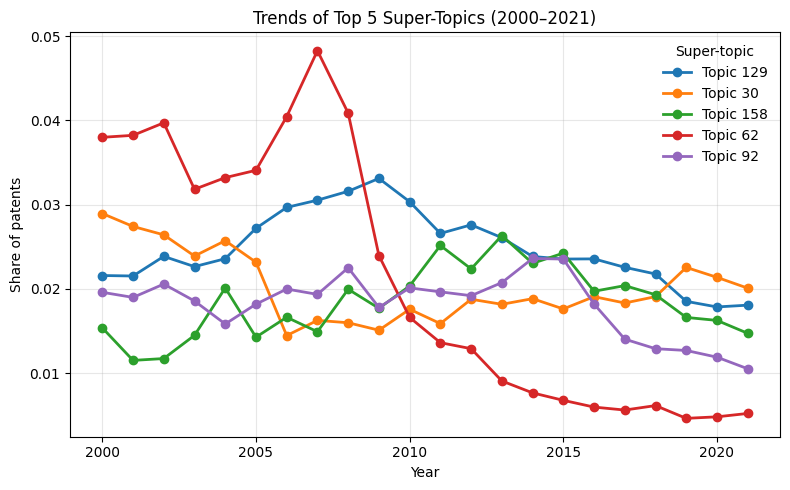

In [ ]:
##Visualize trend of top5 topics from 2000 ro 2021
#get the most relevant topic for each patent and then observe the trend for these topics
top5_topics = (
    dftest['main_super_topic']
    .value_counts()
    .head(5)
    .index
    .tolist()
)

trend_table = (
    dftest[dftest['main_super_topic'].isin(top5_topics)]
    .groupby(['grant_year', 'main_super_topic'])
    .size()
    .reset_index(name='count')
)

total_by_year = dftest.groupby('grant_year').size().reset_index(name='total')

trend_table = trend_table.merge(total_by_year, on='grant_year')
trend_table['share'] = trend_table['count'] / trend_table['total']

plt.figure(figsize=(8, 5))

for topic in top5_topics:
    sub = trend_table[trend_table['main_super_topic'] == topic]
    plt.plot(
        sub['grant_year'],
        sub['share'],
        marker='o',
        linewidth=2,
        label=f'Topic {topic}'
    )

plt.xlabel('Year')
plt.ylabel('Share of patents') #share=count/total
plt.title('Trends of Top 5 Super-Topics (2000–2021)')
plt.legend(title='Super-topic', frameon=False)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()


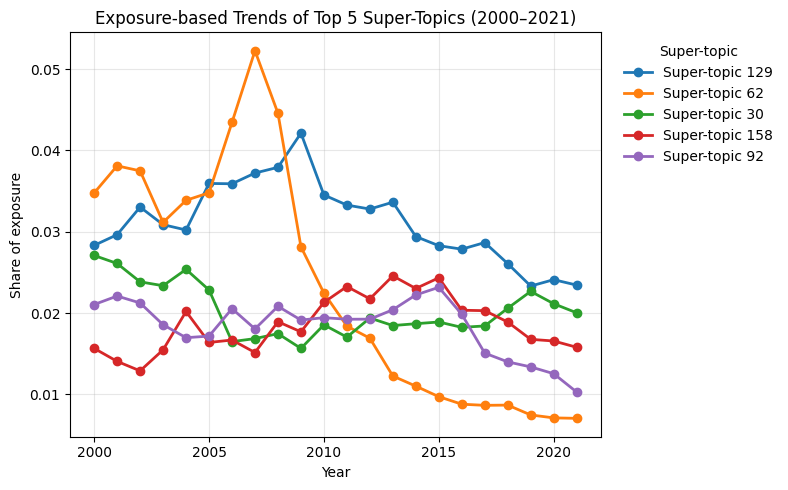

In [ ]:
# for each patent, there're 5 most relevant topics and we calcualte the most frequent topics appear in the entire sample 
dftest['super_topics'] = dftest['super_topics'].apply(ast.literal_eval) #variables in list to integers

df_long = (
    dftest
    .loc[:, ['patent_id', 'grant_year', 'super_topics']]
    .explode('super_topics', ignore_index=True)
    .rename(columns={'super_topics': 'super_topic'})
) #turn the list in super_topics into long data

df_long['super_topic'] = df_long['super_topic'].astype(int)

top5_exposure_topics = (
    df_long['super_topic']
    .value_counts()
    .head(5)
    .index
    .tolist()
)#count the number of super topics

trend_exposure = (
    df_long[df_long['super_topic'].isin(top5_exposure_topics)]
    .groupby(['grant_year', 'super_topic'])
    .size()
    .reset_index(name='count')
)
#In each year, how many times do each top5 topic appear

total_by_year = (
    df_long.groupby('grant_year')
    .size()
    .reset_index(name='total_exposure')
)

trend_exposure = trend_exposure.merge(total_by_year, on='grant_year')
trend_exposure['share'] = (
    trend_exposure['count'] / trend_exposure['total_exposure']
)

topics = top5_exposure_topics  

plt.figure(figsize=(8, 5))

colors = plt.cm.tab10.colors  

for i, topic in enumerate(topics):
    sub = trend_exposure[trend_exposure['super_topic'] == topic]
    plt.plot(
        sub['grant_year'],
        sub['share'],
        linewidth=2,
        marker='o',
        color=colors[i],
        label=f'Super-topic {topic}'
    )

plt.xlabel('Year')
plt.ylabel('Share of exposure')
plt.title('Exposure-based Trends of Top 5 Super-Topics (2000–2021)')
plt.legend(
    title='Super-topic',
    frameon=False,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

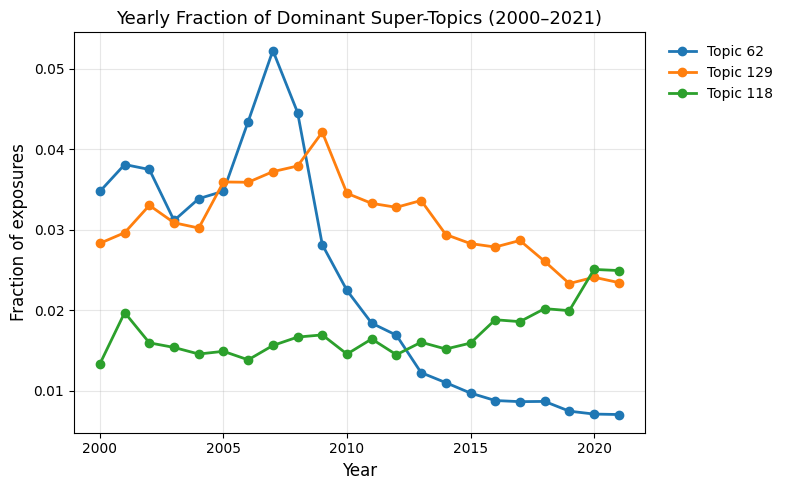

In [16]:
##fraction trend (2000-2021) of patents topics that appear most in each year
df_long3 = (
    dftest
    .loc[:, ['patent_id', 'grant_year', 'super_topics']]
    .explode('super_topics', ignore_index=True)
    .rename(columns={'super_topics': 'super_topic'})
)

df_long3['super_topic'] = df_long3['super_topic'].astype(int)


dominant_topics = [62, 129, 118] #obtained before

topic_year_count = (
    df_long3[df_long3['super_topic'].isin(dominant_topics)]
    .groupby(['grant_year', 'super_topic'])
    .size()
    .reset_index(name='count')
)

total_exposure_year = (
    df_long3
    .groupby('grant_year')
    .size()
    .reset_index(name='total_exposure')
)

topic_year_fraction = (
    topic_year_count
    .merge(total_exposure_year, on='grant_year')
)

topic_year_fraction['fraction'] = (
    topic_year_fraction['count'] /
    topic_year_fraction['total_exposure']
)

plt.figure(figsize=(8, 5))
colors = plt.cm.tab10.colors

for i, topic in enumerate(dominant_topics):
    sub = topic_year_fraction[
        topic_year_fraction['super_topic'] == topic
    ]
    plt.plot(
        sub['grant_year'],
        sub['fraction'],
        marker='o',
        linewidth=2,
        color=colors[i],
        label=f'Topic {topic}'
    )

plt.xlabel('Year', fontsize=12)
plt.ylabel('Fraction of exposures', fontsize=12)
plt.title(
    'Yearly Fraction of Dominant Super-Topics (2000–2021)',
    fontsize=13
)

plt.legend(
    frameon=False,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# Visualize Public Patent (2000-2021)

In [20]:
df_hosp = dftest[dftest['univ_hospital_gov'] == 1].copy() 

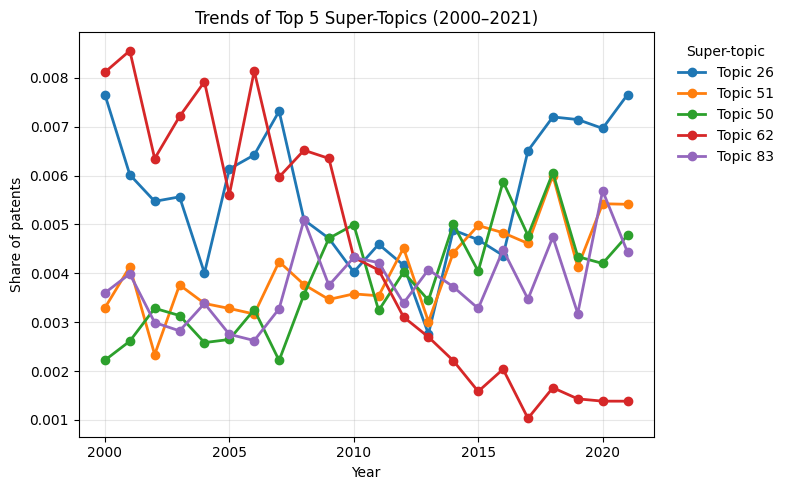

In [ ]:
##fraction trend (2000-2021) of public patents topics that appear most in each year

publictop5_topics = (
    df_hosp['main_super_topic']
    .value_counts()
    .head(5)
    .index
    .tolist()
)

trend_table = (
    df_hosp[df_hosp['main_super_topic'].isin(publictop5_topics)]
    .groupby(['grant_year', 'main_super_topic'])
    .size()
    .reset_index(name='count')
)

total_by_year = dftest.groupby('grant_year').size().reset_index(name='total')

trend_table = trend_table.merge(total_by_year, on='grant_year')
trend_table['share'] = trend_table['count'] / trend_table['total']

plt.figure(figsize=(8, 5))

for topic in publictop5_topics:
    sub = trend_table[trend_table['main_super_topic'] == topic]
    plt.plot(
        sub['grant_year'],
        sub['share'],
        marker='o',
        linewidth=2,
        label=f'Topic {topic}'
    )

plt.xlabel('Year')
plt.ylabel('Share of patents')
plt.title('Trends of Top 5 Super-Topics (2000–2021)')
plt.legend(
    title='Super-topic',
    frameon=False,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

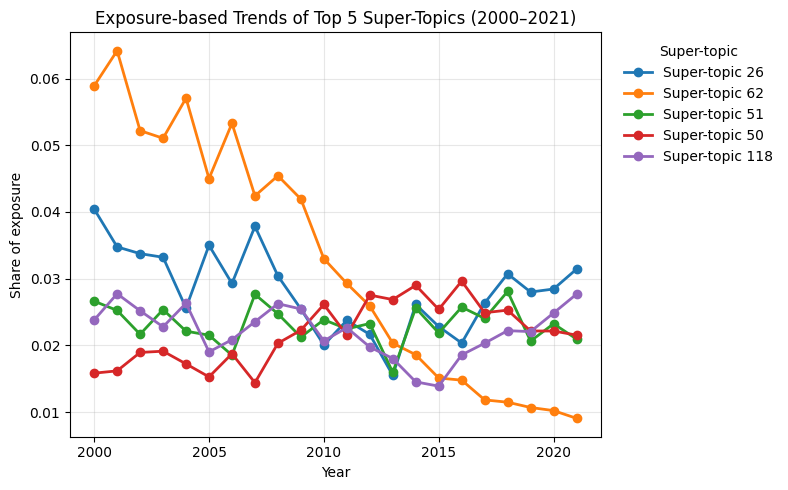

In [ ]:
##In public patent, we calcualte the most frequent topics appear in the entire sample (consider each patent has 5 most-relevant topics)
dfpublic_long2 = (
    df_hosp
    .loc[:, ['patent_id', 'grant_year', 'super_topics']]
    .explode('super_topics', ignore_index=True)
    .rename(columns={'super_topics': 'super_topic'})
)

dfpublic_long2['super_topic'] = dfpublic_long2['super_topic'].astype(int)

top5_exposure_topics = (
    dfpublic_long2['super_topic']
    .value_counts()
    .head(5)
    .index
    .tolist()
)

trend_exposure = (
    dfpublic_long2[dfpublic_long2['super_topic'].isin(top5_exposure_topics)]
    .groupby(['grant_year', 'super_topic'])
    .size()
    .reset_index(name='count')
)

total_by_year = (
    dfpublic_long2.groupby('grant_year')
    .size()
    .reset_index(name='total_exposure')
)

trend_exposure = trend_exposure.merge(total_by_year, on='grant_year')
trend_exposure['share'] = (
    trend_exposure['count'] / trend_exposure['total_exposure']
)

topics = top5_exposure_topics  

plt.figure(figsize=(8, 5))

colors = plt.cm.tab10.colors 

for i, topic in enumerate(topics):
    sub = trend_exposure[trend_exposure['super_topic'] == topic]
    plt.plot(
        sub['grant_year'],
        sub['share'],
        linewidth=2,
        marker='o',
        color=colors[i],
        label=f'Super-topic {topic}'
    )

plt.xlabel('Year')
plt.ylabel('Share of exposure')
plt.title('Exposure-based Trends of Top 5 Super-Topics (2000–2021)')
plt.legend(
    title='Super-topic',
    frameon=False,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

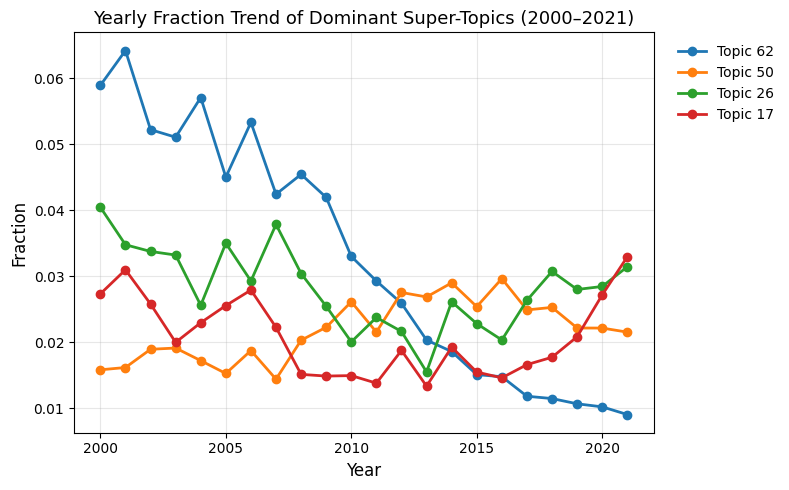

In [ ]:
##visualize topics that most frequently appearing in public patent data 
dfpublic_long3 = (
    df_hosp
    .loc[:, ['patent_id', 'grant_year', 'super_topics']]
    .explode('super_topics', ignore_index=True)
    .rename(columns={'super_topics': 'super_topic'})
)

dfpublic_long3['super_topic'] = dfpublic_long3['super_topic'].astype(int)


pbdominant_topics = [62, 50, 26, 17] #obtained before

topic_year_count = (
    dfpublic_long3[dfpublic_long3['super_topic'].isin(pbdominant_topics)]
    .groupby(['grant_year', 'super_topic'])
    .size()
    .reset_index(name='count')
)

total_exposure_year = (
    dfpublic_long3
    .groupby('grant_year')
    .size()
    .reset_index(name='total_exposure')
)

topic_year_fraction = (
    topic_year_count
    .merge(total_exposure_year, on='grant_year')
)

topic_year_fraction['fraction'] = (
    topic_year_fraction['count'] /
    topic_year_fraction['total_exposure']
)

##fraction trend (2000-2021) of patents topics that appear most in each year
plt.figure(figsize=(8, 5))
colors = plt.cm.tab10.colors

for i, topic in enumerate(pbdominant_topics):
    sub = topic_year_fraction[
        topic_year_fraction['super_topic'] == topic
    ]
    plt.plot(
        sub['grant_year'],
        sub['fraction'],
        marker='o',
        linewidth=2,
        color=colors[i],
        label=f'Topic {topic}'
    )

plt.xlabel('Year', fontsize=12)
plt.ylabel('Fraction', fontsize=12)
plt.title(
    'Yearly Fraction Trend of Dominant Super-Topics (2000–2021)',
    fontsize=13
)

plt.legend(
    frameon=False,
    bbox_to_anchor=(1.02, 1),
    loc='upper left'
)

plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()